In [52]:
import re
import warnings
import pandas as pd

def eval_from_log(path:str):
    pattern = re.compile("= -?\d.\d\d\d\d?")
    
    v=[]

    for i, line in enumerate(open(path, 'r')):
        for match in re.finditer(pattern, line):
            # print(match.group()[0])
            v.append(float(match.group()[2:]))
    try:
        out = {'mAP': v[0], 'mAP.5': v[1], 'mAP.75': v[2], 'mAPs': v[3], 'mAPm': v[4], 'mAPl': v[5], 'LAMR': round(v[12], 3)}
    except IndexError:
        warnings.warn(f'log {path} file had no match with pattern, setting all values to NaN')
        nan = float('NaN')
        out = {'mAP': nan, 'mAP.5': nan, 'mAP.75': nan, 'mAPs': nan, 'mAPm': nan, 'mAPl': nan, 'LAMR': nan}
    return out


def eval_df(paths, name=None):
    values = []
    for i, p in enumerate(paths):
        if isinstance(p, tuple):
            values.append(list(p[1].values()) + list(eval_from_log(p[0]).values()))
        else:
            values.append(list(eval_from_log(p).values()))

    if isinstance(p, tuple):
        df = pd.DataFrame(values, columns=list(p[1].keys()) + ['AP','AP@.5','AP@.75','AP S','AP M','AP L','LAMR'])
        df = df.melt(id_vars=list(p[1].keys()), var_name='metric')
    else:
        df = pd.DataFrame(values, columns=['AP','AP@.5','AP@.75','AP S','AP M','AP L','LAMR'])
        df = df.melt(var_name='metric')

    return df

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_palette(sb.color_palette(['#179C7D','#006E92','#EB6A0A'])) # KIT green, blue, orange
# sb.set_palette(sb.color_palette(['#179C7D','#52E5C3'])) # KIT green shades
sb.set_context('talk')
sb.set_style('darkgrid')

In [53]:
import string

PIROPO = []
PIROPO_FT = []
PIROPO_MW = []
PIROPO_FT_MW = []
GPA_PIROPO = []
PIROPO.append(('PIROPO/sweep/test2_0.txt', {'# training images': 0, 'id': 'a'}))
for n in [1,2,5,10,20,50,100,200,500,1000]:
    for l in range(10):
        PIROPO.append((f'PIROPO/sweep/test2_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))
        PIROPO_FT.append((f'PIROPO/sweep_ft/test2_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))
        PIROPO_MW.append((f'PIROPO_MW/sweep/test_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))
        PIROPO_FT_MW.append((f'PIROPO_MW/sweep_ft/test_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))
 
PIROPO.append(('PIROPO/sweep/test2_all.txt', {'# training images': 2357, 'id': 'a'}))
PIROPO_FT.append(('PIROPO/sweep_ft/test2_all.txt', {'# training images': 2357, 'id': 'a'}))
PIROPO_MW.append(('PIROPO_MW/sweep/test_all.txt', {'# training images': 2357, 'id': 'a'}))
PIROPO_FT_MW.append(('PIROPO_MW/sweep_ft/test_all.txt', {'# training images': 2357, 'id': 'a'}))

for n in [1,2,5,10,20,50,100]:
    for l in range(10):
        GPA_PIROPO.append((f'GPA/coco_piropo_{n}{string.ascii_lowercase[l]}.txt',\
            {'# training images': n, 'id': string.ascii_lowercase[l]}))  

MW_18MAR = []
MW_PIROPO = []
MW_BOMNI = []
MW_18MAR.append(('MW-18Mar/sweep/test_0.txt', {'# training images': 0, 'id': 'a'}))
for n in [1,2,5,10,20,50,100,200]:
    for l in range(10):
        MW_18MAR.append((f'MW-18Mar/sweep/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
        MW_PIROPO.append((f'MW_PIROPO/sweep/test2_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
        MW_BOMNI.append((f'MW_BOMNI/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
MW_18MAR.append(('MW-18Mar/sweep/test_all.txt', {'# training images': 819, 'id': 'a'}))
MW_PIROPO.append(('MW_PIROPO/sweep/test2_all.txt', {'# training images': 819, 'id': 'a'}))
MW_BOMNI.append(('MW_BOMNI/test_all.txt', {'# training images': 819, 'id': 'a'}))

PIROPOMW = [
    ('PIROPO+MW/sweep/MW-18Mar_test.txt', {'# training images': 3176, 'id': 'a'}),
    ('PIROPO+MW/sweep/PIROPO_omni_test2.txt', {'# training images': 3176, 'id': 'a'})
]

BOMNI = []
BOMNI.append(('BOMNI/test_0.txt', {'# training images': 0, 'id': 'a'}))
for n in [1,2,5,10,20,50,100]:
    for l in range(10):
        BOMNI.append((f'BOMNI/test_{n}{string.ascii_lowercase[l]}.txt', {'# training images': n, 'id': string.ascii_lowercase[l]}))
BOMNI.append(('BOMNI/test_all.txt', {'# training images': 236, 'id': 'a'}))


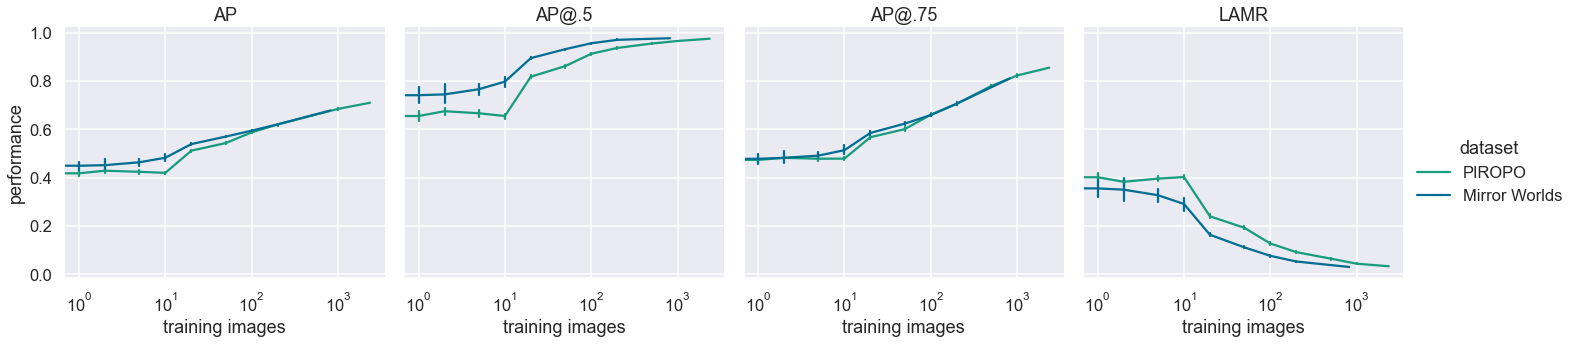

In [54]:
# baseline
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='dataset', value='PIROPO')

mw = eval_df(MW_18MAR)
mw.insert(loc=0, column='dataset', value='Mirror Worlds')

df = pd.concat([piropo, mw], ignore_index=True)

# sb.set(rc={'figure.figsize':(60,12)})
# sb.set_palette(sb.color_palette(['#179C7D','#006E92','#EB6A0A'])) # KIT green, blue, orange
# sb.set_context('talk')

# import matplotlib.pyplot as pyplot
# fig, ax = pyplot.subplots(figsize=(25, 5))

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric', hue='dataset', height=5, aspect=1.)
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
g.set_xlabels('training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
plt.xscale('log')

g.savefig(f'images/baseline_piropo_mw_faulty.svg')

<ipython-input-23-fc1d3ae628fa>:17: UserWarning: log GPA/coco_piropo_20a.txt file had no match with pattern, setting all values to NaN
  warnings.warn(f'log {path} file had no match with pattern, setting all values to NaN')
<ipython-input-23-fc1d3ae628fa>:17: UserWarning: log GPA/coco_piropo_100a.txt file had no match with pattern, setting all values to NaN
  warnings.warn(f'log {path} file had no match with pattern, setting all values to NaN')
<ipython-input-23-fc1d3ae628fa>:17: UserWarning: log GPA/coco_piropo_100b.txt file had no match with pattern, setting all values to NaN
  warnings.warn(f'log {path} file had no match with pattern, setting all values to NaN')


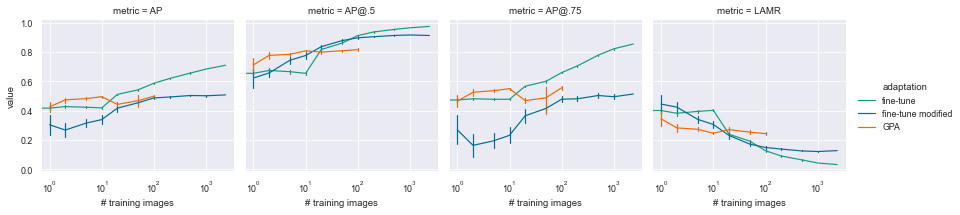

In [26]:
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='adaptation', value='fine-tune')

piropo_ft = eval_df(PIROPO_FT)
piropo_ft.insert(loc=0, column='adaptation', value='fine-tune modified')

gpa_piropo = eval_df(GPA_PIROPO)
gpa_piropo.insert(loc=0, column='adaptation', value='GPA')

df = pd.concat([piropo, piropo_ft, gpa_piropo], ignore_index=True)

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric', hue='adaptation')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
plt.xscale('log')

# g.savefig('piropo.png')

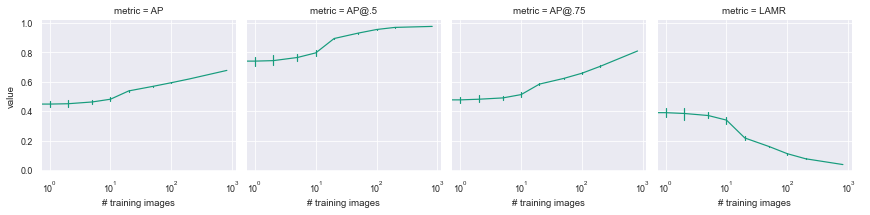

In [145]:
df = eval_df(MW_18MAR)

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
plt.xscale('log')

g.savefig('mw-18mar.png')

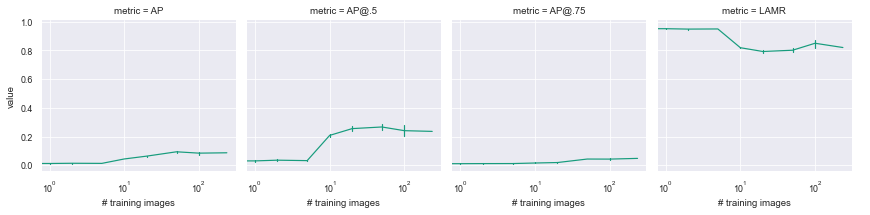

In [10]:
df = eval_df(BOMNI)

g = sb.FacetGrid(df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])], col='metric')
g.map(sb.lineplot, '# training images', 'value', err_style='bars')
g.add_legend()
plt.xscale('log')

g.savefig('bomni.png')

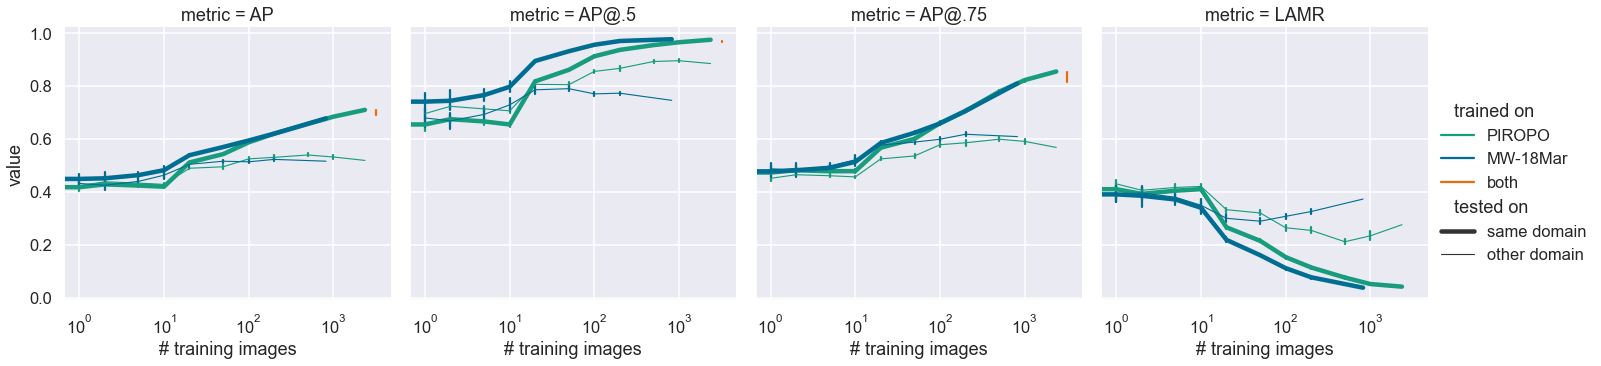

In [87]:
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='tested on', value='same domain')
piropo.insert(loc=0, column='trained on', value='PIROPO')

piropo_mw = eval_df(PIROPO_MW)
piropo_mw.insert(loc=0, column='tested on', value='other domain')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')

mw_18mar = eval_df(MW_18MAR)
mw_18mar.insert(loc=0, column='tested on', value='same domain')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')

mw_piropo = eval_df(MW_PIROPO)
mw_piropo.insert(loc=0, column='tested on', value='other domain')
mw_piropo.insert(loc=0, column='trained on', value='MW-18Mar')

piropomw = eval_df(PIROPOMW)
piropomw.insert(loc=0, column='tested on', value='same domain')
piropomw.insert(loc=0, column='trained on', value='both')

df = pd.concat([piropo, piropo_mw, mw_18mar, mw_piropo, piropomw], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

sb.set_context('talk')

g = sb.relplot(data=df, x='# training images', y='value', col='metric', hue='trained on', size='tested on', kind='line', err_style='bars')
plt.xscale('log')

g.savefig('cross_domain.png')
sb.set_context('paper')

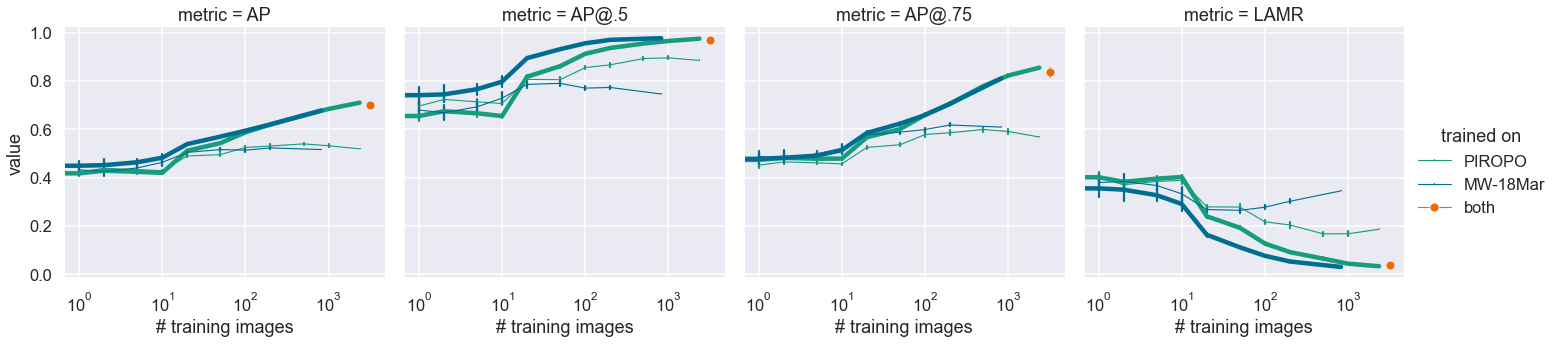

In [6]:
piropo = eval_df(PIROPO)
piropo.insert(loc=0, column='cross domain', value='no')
piropo.insert(loc=0, column='tested on', value='PIROPO')
piropo.insert(loc=0, column='trained on', value='PIROPO')

piropo_mw = eval_df(PIROPO_MW)
piropo_mw.insert(loc=0, column='cross domain', value='yes')
piropo_mw.insert(loc=0, column='tested on', value='MW-18Mar')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')

mw_18mar = eval_df(MW_18MAR)
mw_18mar.insert(loc=0, column='cross domain', value='no')
mw_18mar.insert(loc=0, column='tested on', value='MW-18Mar')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')

mw_piropo = eval_df(MW_PIROPO)
mw_piropo.insert(loc=0, column='cross domain', value='yes')
mw_piropo.insert(loc=0, column='tested on', value='PIROPO')
mw_piropo.insert(loc=0, column='trained on', value='MW-18Mar')

piropomw = eval_df(PIROPOMW)
piropomw.insert(loc=0, column='cross domain', value='no')
piropomw.insert(loc=0, column='tested on', value='both')
piropomw.insert(loc=0, column='trained on', value='both')

df = pd.concat([piropo, piropo_mw, mw_18mar, mw_piropo, piropomw], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

sb.set_context('talk')

g = sb.FacetGrid(df, col='metric', hue='trained on', hue_kws={'marker': [',',',','o']}, height=5)
g.map(sb.lineplot, '# training images', 'value', err_style='bars', size=df['cross domain'])
g.add_legend(adjust_subtitles=True)
plt.xscale('log')

g.savefig('cross_domain.png')
sb.set_context('paper')

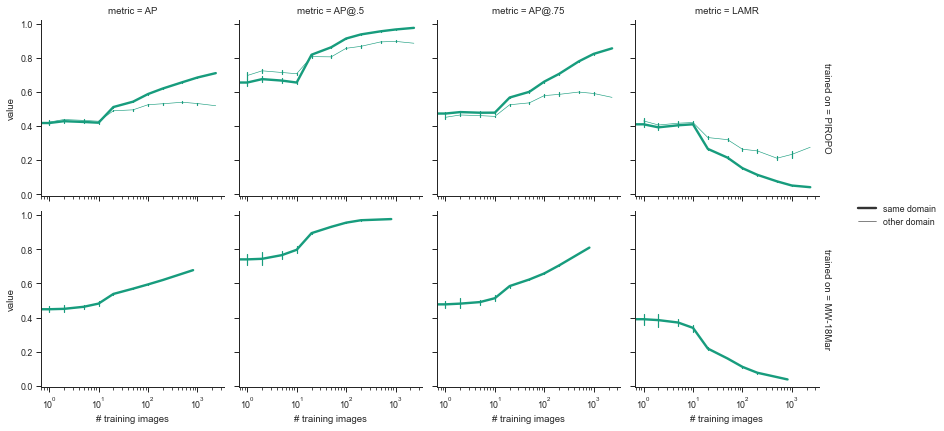

In [121]:
# fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 4.5))
# ax[0].set_title('AP')
# ax[1].set_title('AP@0.5')
# ax[2].set_title('LAMR')

# ax[0].plot()
piropo = eval_df(PIROPO)
piropo_mw = eval_df(PIROPO_MW)
mw_18mar = eval_df(MW_18MAR)
piropo.insert(loc=0, column='tested on', value='same domain')
piropo_mw.insert(loc=0, column='tested on', value='other domain')
mw_18mar.insert(loc=0, column='tested on', value='same domain')
piropo.insert(loc=0, column='trained on', value='PIROPO')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')
df = pd.concat([piropo, piropo_mw, mw_18mar], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

g = sb.FacetGrid(df, row='trained on', col='metric', margin_titles=True)
g.map(sb.lineplot, '# training images', 'value', err_style='bars', size=df['tested on'])
g.add_legend(adjust_subtitles=True)
# g.fig.subplots_adjust(hspace=.3)
plt.xscale('log')
# sb.lineplot(x='split', y='mAP', data=df)

g.savefig('piropo_mw.png')


   # training images id metric  value
0                  0  a     AP  0.383
1                  1  a     AP  0.414
2                  1  b     AP  0.421
3                  1  c     AP  0.393
4                  1  d     AP  0.424
   # training images id metric  value
0                  1  a     AP  0.413
1                  1  b     AP  0.418
2                  1  c     AP  0.405
3                  1  d     AP  0.433
4                  1  e     AP  0.439
   # training images id metric  value
0                  0  a     AP  0.400
1                  1  a     AP  0.497
2                  1  b     AP  0.474
3                  1  c     AP  0.420
4                  1  d     AP  0.400


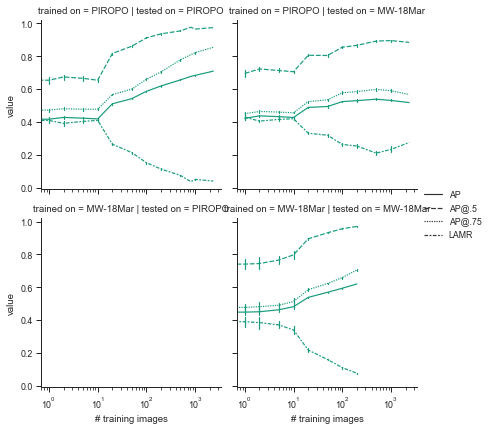

In [100]:
# fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(24, 4.5))
# ax[0].set_title('AP')
# ax[1].set_title('AP@0.5')
# ax[2].set_title('LAMR')

# ax[0].plot()
piropo = eval_df(PIROPO)
piropo_mw = eval_df(PIROPO_MW)
mw_18mar = eval_df(MW_18MAR)
piropo.insert(loc=0, column='tested on', value='PIROPO')
piropo_mw.insert(loc=0, column='tested on', value='MW-18Mar')
mw_18mar.insert(loc=0, column='tested on', value='MW-18Mar')
piropo.insert(loc=0, column='trained on', value='PIROPO')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')
df = pd.concat([piropo, piropo_mw, mw_18mar], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

g = sb.FacetGrid(df, row='trained on', col='tested on')
g.map(sb.lineplot, '# training images', 'value', err_style='bars', style=df['metric'])
g.add_legend(adjust_subtitles=True)
# g.fig.subplots_adjust(hspace=.3)
plt.xscale('log')
# sb.lineplot(x='split', y='mAP', data=df)

g.savefig('piropo_mw.png')


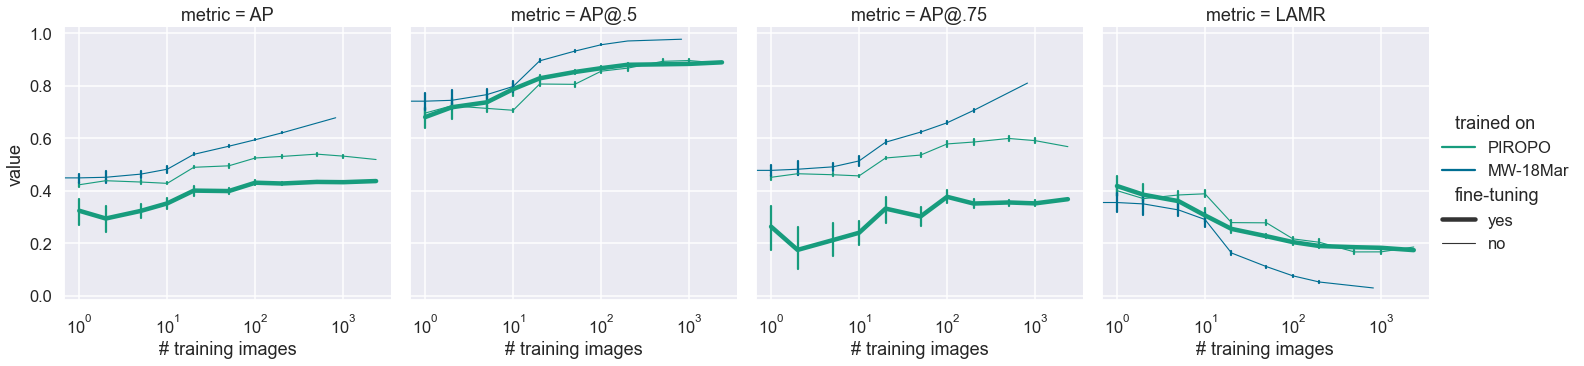

In [12]:
# piropo = eval_df(PIROPO)
# piropo.insert(loc=0, column='tested on', value='same domain')
# piropo.insert(loc=0, column='trained on', value='PIROPO')

piropo_mw = eval_df(PIROPO_MW)
piropo_mw.insert(loc=0, column='fine-tuning', value='no')
piropo_mw.insert(loc=0, column='trained on', value='PIROPO')

piropo_ft_mw = eval_df(PIROPO_FT_MW)
piropo_ft_mw.insert(loc=0, column='fine-tuning', value='yes')
piropo_ft_mw.insert(loc=0, column='trained on', value='PIROPO')

mw_18mar = eval_df(MW_18MAR)
mw_18mar.insert(loc=0, column='fine-tuning', value='no')
mw_18mar.insert(loc=0, column='trained on', value='MW-18Mar')

# mw_piropo = eval_df(MW_PIROPO)
# mw_piropo.insert(loc=0, column='tested on', value='other domain')
# mw_piropo.insert(loc=0, column='trained on', value='MW-18Mar')

# piropomw = eval_df(PIROPOMW)
# piropomw.insert(loc=0, column='tested on', value='same domain')
# piropomw.insert(loc=0, column='trained on', value='both')

df = pd.concat([piropo_ft_mw, piropo_mw, mw_18mar], ignore_index=True)

df = df[df['metric'].isin(['AP','AP@.5','AP@.75','LAMR'])]

sb.set_context('talk')

g = sb.relplot(data=df, x='# training images', y='value', col='metric', hue='trained on', size='fine-tuning', kind='line', err_style='bars')
plt.xscale('log')

g.savefig('cross_domain.png')
sb.set_context('paper')

### analyze the loss
For good results, `log_config` `interval` should be set low, e.g.

```
log_config = dict(interval=1, hooks=[dict(type='TextLoggerHook')])
```

```bash
python mmdetection/tools/analysis_tools/analyze_logs.py plot_curve /home/thaddaus/MasterthesisCode/work_dirs/GPA/coco_piropo_100a/20210713_205411.log.json --keys loss_rpn_cls loss_rpn_bbox loss_cls loss_bbox roi_loss_intra roi_loss_inter rcnn_loss_intra rcnn_loss_inter loss --legend loss_rpn_cls loss_rpn_bbox loss_cls loss_bbox roi_loss_intra roi_loss_inter rcnn_loss_intra rcnn_loss_inter loss
```

In [1]:
import json
import re
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import time

sb.set_context('paper')
sb.set_style('darkgrid')
sb.set_palette(sb.color_palette(['#179C7D','#006E92','#25BAE2','#EB6A0A'])) # KIT green, blue, light blue, orange
# sb.set_palette(sb.color_palette(['#179C7D','#52E5C3','#8CEED7','#C5F6EB'])) # KIT green shades

log = 'GPA/coco_piropo_100a.log'
keys = ['loss_rpn_cls', 'loss_rpn_bbox', 'loss_cls', 'loss_bbox', 'roi_loss_intra', 'roi_loss_inter', 'rcnn_loss_intra', 'rcnn_loss_inter', 'loss']

def keys_from_log_epoch(path: str, keys: list[str]):
    line_pattern = '(.*) - mmdet - INFO - Epoch \[(\d+)\]\[(\d+).*'
    line_pattern = re.compile(line_pattern)
    
    out = {'time': [], 'epoch':[], 'batch': []}

    key_patterns = []
    for key in keys:
        out.update({key: []})
        key_patterns.append(re.compile(f'{key}: (nan|-?\d*.?\d*e?-?\d*),?'))

    for i, line in enumerate(open(path, 'r')):
        for match in re.finditer(line_pattern, line):
            out['time'].append(match.group(1))
            out['epoch'].append(int(match.group(2)))
            out['batch'].append(int(match.group(3)))
            for key, pattern in zip(keys, key_patterns):
                out[key].append(float(re.findall(pattern, match.group(0))[0]))
    return out

def keys_from_log(path: str, keys: list[str]):    
    out = {}
    key_patterns = []
    for key in keys:
        out.update({key: []})
        key_patterns.append(re.compile(f'{key}: (nan|-?\d*.?\d*e?-?\d*),?'))

    for i, line in enumerate(open(path, 'r')):
        for key, pattern in zip(keys, key_patterns):
            for match in re.finditer(pattern, line):
                out[key].append(float(match.group(1)))
    out.update({'occurence': range(len(out[keys[0]]))})
    return out

def smooth(y, window_length):
    window = np.ones(window_length)/window_length
    y_smooth = np.convolve(y, window, mode='same')
    return y_smooth


,time,epoch,batch,iteration,metric,value
336,"2021-07-13 21:54:01,283",1,1,1,roi_loss_intra,0.0406
337,"2021-07-13 21:54:03,378",1,2,2,roi_loss_intra,0.0408
338,"2021-07-13 21:54:05,731",1,3,3,roi_loss_intra,0.0445
339,"2021-07-13 21:54:07,788",1,4,4,roi_loss_intra,0.0347
340,"2021-07-13 21:54:09,884",1,5,5,roi_loss_intra,0.0505


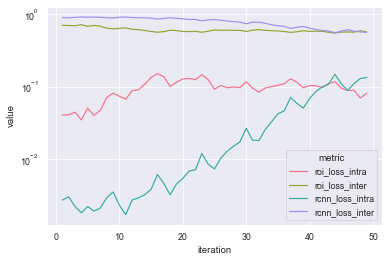

In [117]:
log = 'GPA/coco_piropo_100a_exploding.log'

df = pd.DataFrame(keys_from_log(log, keys))
df = df.melt(id_vars=['time', 'epoch', 'batch'], var_name='metric')
df.insert(loc=3, column='iteration', value=(df['epoch']-1)*7+df['batch'])

g = sb.lineplot(data=df.loc[(df['metric'].isin(['roi_loss_inter', 'roi_loss_intra', 'rcnn_loss_inter', 'rcnn_loss_intra'])) & (df['iteration']<50)], x='iteration', y='value', hue='metric')
plt.yscale('log')

df[df['metric']=='roi_loss_intra'].head()



,time,epoch,batch,iteration,metric,value
336,"2021-07-13 23:57:04,724",1,1,1,roi_loss_intra,0.0405
337,"2021-07-13 23:57:06,927",1,2,2,roi_loss_intra,0.0374
338,"2021-07-13 23:57:09,222",1,3,3,roi_loss_intra,0.0373
339,"2021-07-13 23:57:11,377",1,4,4,roi_loss_intra,0.0307
340,"2021-07-13 23:57:13,180",1,5,5,roi_loss_intra,0.0459


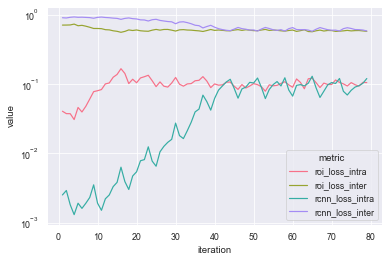

In [123]:
log = 'GPA/coco_piropo_100a_not_exploding.log'

df = pd.DataFrame(keys_from_log(log, keys))
df = df.melt(id_vars=['time', 'epoch', 'batch'], var_name='metric')
df.insert(loc=3, column='iteration', value=(df['epoch']-1)*7+df['batch'])

g = sb.lineplot(data=df.loc[(df['metric'].isin(['roi_loss_inter', 'roi_loss_intra', 'rcnn_loss_inter', 'rcnn_loss_intra'])) & (df['iteration']<80)], x='iteration', y='value', hue='metric')
plt.yscale('log')

df[df['metric']=='roi_loss_intra'].head()


,time,epoch,batch,iteration,metric,value
1344,"2021-07-20 22:47:13,343",1,1,1,loss,0.12995
1345,"2021-07-20 22:47:15,626",1,2,2,loss,0.15145
1346,"2021-07-20 22:47:17,848",1,3,3,loss,0.17330
1347,"2021-07-20 22:47:19,715",1,4,4,loss,0.19536
1348,"2021-07-20 22:47:21,842",1,5,5,loss,0.21957


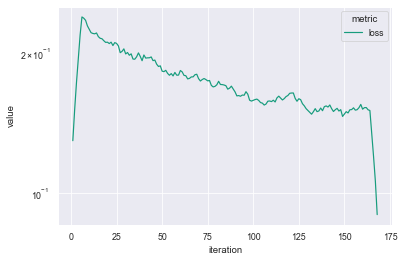

In [76]:
log = 'GPA/tuning/coco_piropo_100a_ft_24_nostep_iter.log'

df = pd.DataFrame(keys_from_log_epoch(log, keys))
df = df.melt(id_vars=['time', 'epoch', 'batch'], var_name='metric')
df.insert(loc=3, column='iteration', value=(df['epoch']-1)*7+df['batch'])

# smooth losses
df.loc[df['metric']=='loss', 'value'] = smooth(df[df['metric']=='loss']['value'], 10)

g = sb.lineplot(data=df.loc[(df['metric'].isin(['loss'])) &(df['iteration']<26*7)], x='iteration', y='value', hue='metric')
plt.yscale('log')

df[df['metric']=='loss'].head()
# g.get_figure().savefig(f'images/tuning_ft_24_losses{time.strftime("%Y%m%d_%H%M%S")}.png')


,occurence,metric,value
0,0,loss,0.2412
1,1,loss,0.2412
2,2,loss,0.2589
3,3,loss,0.2589
4,4,loss,0.2888


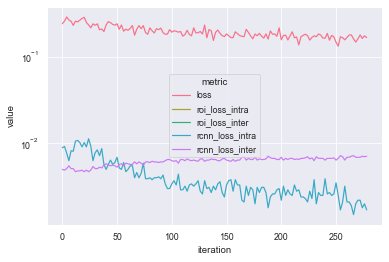

In [15]:
log = 'GPA/tuning/coco_piropo_100a_da_rcnn01_intra1_inter01_cosine_notarget_nostep_iter.log'

# df = pd.DataFrame(keys_from_log(log, ['bbox_mAP_50']))
df = pd.DataFrame(keys_from_log(log, ['loss', 'roi_loss_intra', 'roi_loss_inter', 'rcnn_loss_intra', 'rcnn_loss_inter']))
df = df.melt(id_vars=['occurence'], var_name='metric')
# df.insert(loc=3, column='iteration', value=(df['epoch']-1)*7+df['batch'])

# smooth losses
# df.loc[df['metric']=='loss', 'value'] = smooth(df[df['metric']=='loss']['value'], 10)

g = sb.lineplot(data=df.loc[df['occurence']%2==0], x='occurence', y='value', hue='metric')
plt.yscale('log')
plt.xlabel('iteration')
# g.set_xticklabels([0,1,6,11,16,21])

df.head()
# g.get_figure().savefig(f'images/tuning_ft_24_nostep_map{time.strftime("%Y%m%d_%H%M%S")}.png')

,occurence,metric,split,i,mode,value
0,1.0,bbox_mAP_50,a,0,rand,0.804
2,2.0,bbox_mAP_50,a,0,rand,0.826
4,3.0,bbox_mAP_50,a,0,rand,0.808
6,4.0,bbox_mAP_50,a,0,rand,0.836
8,5.0,bbox_mAP_50,a,0,rand,0.828


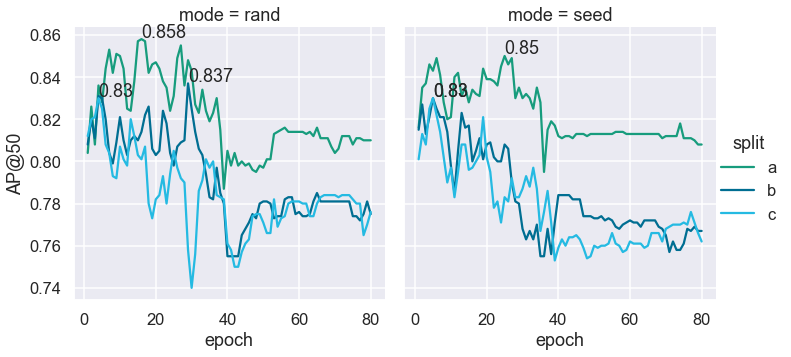

In [82]:
# how high is training variance across splits and epochs?
# --> very high. need to test every epoch (early stopping) and check how to reduce variance.
logs = [['GPA/tuning/coco_piropo_100a_ft_80_step40.log', 'a', '0', 'rand'],
        ['GPA/tuning/coco_piropo_100b_ft_80_step40.log', 'b', '0', 'rand'],
        ['GPA/tuning/coco_piropo_100c_ft_80_step40.log', 'c', '0', 'rand'],
        ['GPA/tuning/coco_piropo_100a_ft_80_step40_seeded.log', 'a', '0', 'seed'],
        ['GPA/tuning/coco_piropo_100b_ft_80_step40_seeded.log', 'b', '0', 'seed'],
        ['GPA/tuning/coco_piropo_100c_ft_80_step40_seeded.log', 'c', '0', 'seed']]

sb.set_context('talk')

dfs = []
maxs = []
for log, split, i, mode in logs:
    df = pd.DataFrame(keys_from_log(log, ['bbox_mAP_50']))
    # df = pd.DataFrame(keys_from_log(log, ['loss', 'roi_loss_intra', 'roi_loss_inter', 'rcnn_loss_intra', 'rcnn_loss_inter']))
    df = df.melt(id_vars=['occurence'], var_name='metric')
    # remove every second occurence and label them correctly
    df['occurence']=df['occurence']/2+1
    df = df.drop(df[df['occurence']%1!=0].index) 
    df.insert(loc=2, column='split', value=split)
    df.insert(loc=3, column='i', value=i)
    df.insert(loc=4, column='mode', value=mode)

    maxs.append(df.loc[df[df['metric']=='bbox_mAP_50']['value'].idxmax()])
    dfs.append(df)

df = pd.concat(dfs, axis=0)
g = sb.relplot(data=df, x='occurence', y='value', hue='split', col='mode', kind='line')
g.set_axis_labels('epoch', 'AP@50')

# annotate max
for i, entry in enumerate(maxs):
    g.axes[0][i//3].annotate(entry['value'], xy=(entry['occurence'], entry['value']), xytext=(entry['occurence'], entry['value']+0.001))


In [1]:
# how high is intra-split variance with/without seed?
# --> much lower than inter-split variance, and even lower when seed is used. seems acceptable (<0.5pp).
logs = [['GPA/tuning/coco_piropo_100a_ft_80_step40.log', 'a', '0', 'random'],
        ['GPA/tuning/coco_piropo_100a_ft_80_step40_seeded.log', 'a', '0', 'seeded'],
        ['GPA/tuning/coco_piropo_100a_ft_401.log', 'a', '1', 'random'],
        ['GPA/tuning/coco_piropo_100a_ft_402.log', 'a', '2', 'random'],
        ['GPA/tuning/coco_piropo_100a_ft_40_seed1.log', 'a', '1', 'seeded'],
        ['GPA/tuning/coco_piropo_100a_ft_40_seed2.log', 'a', '2', 'seeded']]

sb.set_context('talk')

dfs = []
maxs = []
for log, split, i, mode in logs:
    df = pd.DataFrame(keys_from_log(log, ['bbox_mAP_50']))
    # df = pd.DataFrame(keys_from_log(log, ['loss', 'roi_loss_intra', 'roi_loss_inter', 'rcnn_loss_intra', 'rcnn_loss_inter']))
    df = df.melt(id_vars=['occurence'], var_name='metric')
    # remove every second occurence and label them correctly
    df['occurence']=df['occurence']/2+1
    df = df.drop(df[df['occurence']%1!=0].index) 
    df.insert(loc=2, column='split', value=split)
    df.insert(loc=3, column='i', value=i)
    df.insert(loc=4, column='mode', value=mode)

    maxs.append(df.loc[df[df['metric']=='bbox_mAP_50']['value'].idxmax()])
    dfs.append(df)

df = pd.concat(dfs, axis=0)
g = sb.relplot(data=df.loc[df['occurence']<40], x='occurence', y='value', col='mode', kind='line', height=5, aspect=1.)#, hue='i')
g.set_axis_labels('epoch', 'AP@50')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# annotate max
# for i, entry in enumerate(maxs[:6]):
    # g.axes[0][i//3].annotate(entry['value'], xy=(entry['occurence'], entry['value']), xytext=(entry['occurence'], entry['value']+0.001))

# g.savefig(f'images/meta_intra_split_variance_random_vs_seeded.svg')

NameError: name 'sb' is not defined

[0.85, 0.863, 0.85, 0.849, 0.869]


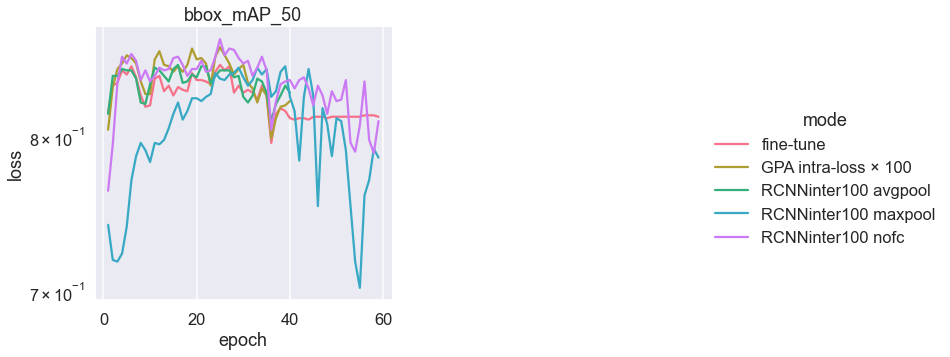

In [38]:
# which adaptations improve performance on (seeded) split 100a?
# -> euclidean might work best
# -> both losses can be decreased individually, but currently not together
# -> da=1 might be too high, losses explode
# -> higher intra vs inter helps, but not unlimited
logs = [
        ['GPA/tuning/coco_piropo_100a_ft_80_step40_seeded.log', 'a', '0', 'fine-tune'],                                # baseline
        # ['GPA/tuning/coco_piropo_100a_da01roi0rcnn1intra1inter0cosine_seed.log', 'a', '0', '"best"'],                  # previous best experiment
        # ['GPA/tuning/coco_piropo_100a_da1roi1rcnn1intra1inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'std'],   # -> roi intra-loss epxlode
        # ['GPA/tuning/coco_piropo_100a_da01roi1rcnn1intra1inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'GPA × 0.1'],# -> can't decrease intra-losses
        # ['GPA/tuning/coco_piropo_100a_da1roi1rcnn1intra1inter1nFalsegtTruemean_squared_seed.log', 'a', '0', 'gt'],     # -> roi intra-loss explode
        # ['GPA/tuning/coco_piropo_100a_da1roi1rcnn1intra1inter1nTruegtFalsemean_squared_seed.log', 'a', '0', 'norm'],   # -> roi intra-loss explode
        # ['GPA/tuning/coco_piropo_100a_da1roi1rcnn1intra1inter1nFalsegtFalseeuclidean_seed.log', 'a', '0', 'eucl'],     # -> might have worked with more epochs, most "well-behaved" loss, all losses decrease
        # ['GPA/tuning/coco_piropo_100a_da1roi1rcnn1intra1inter1nFalsegtFalsecosine_seed.log', 'a', '0', 'cosine'],      # -> no improvement, but all losses decrease
        # ['GPA/tuning/coco_piropo_100a_da1roi1rcnn0intra1inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'ROI'],   # -> unstable, but eventual improvement, might have worked with more epochs
        # ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra1inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'RCNN'],  # -> no improvement, losses explode
        # ['GPA/tuning/coco_piropo_100a_da1roi1rcnn1intra0inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'only inter'], # -> 0.875!
        # ['GPA/tuning/coco_piropo_100a_da1roi1rcnn1intra1inter0nFalsegtFalsemean_squared_seed.log', 'a', '0', 'GPA only intra-loss'], # -> 0.856
        # ['GPA/tuning/coco_piropo_100a_da1roi0rcnn10intra1inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'RCNN10'],# -> explode
        # ['GPA/tuning/coco_piropo_100a_da1roi0rcnn100intra1inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'RCNN100'],# -> explode
        # ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1000intra1inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'RCNN1000'],# -> explode
        # ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra10inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'RCNN intra 10'],# -> 0.846
        ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed0.log', 'a', '0', 'GPA intra-loss × 100'],# -> 0.863!
        # ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra1000inter1nFalsegtFalsemean_squared_seed.log', 'a', '0', 'RCNN intra 1000'],# -> 0.857
        # ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra10inter0nFalsegtFalsemean_squared_seed.log', 'a', '0', 'RCNN intra 10 inter 0'],# -> 0.855
        # ['GPA/tuning/coco_piropo_100a_da01roi1rcnn1intra1inter1nFalsegtFalsemean_squared_seed_trainsrc.log', 'a', '0', 'GPA0.1 + src'],# no improvement
        # ['GPA/tuning/coco_piropo_100a_da01roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed_trainsrc.log', 'a', '0', 'GPA0.1 + intra100 + src'],# no improvement
        ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seedapool.log', 'a', '0', 'RCNNinter100 avgpool'], # no improvement
        ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seedmpool.log', 'a', '0', 'RCNNinter100 maxpool'], # takes long to learn anything
        ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed_nofc.log', 'a', '0', 'RCNNinter100 nofc'], # 0.869!
    ]
sb.set_context('talk')
sb.set_palette(sb.color_palette(['#179C7D','#006E92','#EB6A0A'])) # KIT green, blue, orange

dfs = []
maxs = []
for log, split, i, mode in logs:
    df = pd.DataFrame(keys_from_log(log, ['bbox_mAP_50']))
    # df = pd.DataFrame(keys_from_log(log, ['roi_loss_intra', 'roi_loss_inter', 'rcnn_loss_intra', 'rcnn_loss_inter']))
    df = df.melt(id_vars=['occurence'], var_name='metric')
    # remove every second occurence and label them correctly
    df['occurence']=df['occurence']/2+1
    df = df.drop(df[df['occurence']%1!=0].index) 
    df.insert(loc=2, column='split', value=split)
    df.insert(loc=3, column='i', value=i)
    df.insert(loc=4, column='mode', value=mode)

    maxs.append(df.loc[df[df['metric']=='bbox_mAP_50']['value'].idxmax()])
    dfs.append(df)

df = pd.concat(dfs, axis=0)
g = sb.relplot(data=df.loc[df['occurence']<60], x='occurence', y='value', hue='mode', kind='line', col='metric', height=5, aspect=1., col_wrap=2)
g.set_axis_labels('epoch', 'loss')
g.set_titles(col_template='{col_name}', row_template='')
plt.yscale('log')

print([m['value'] for m in maxs])
# loc = [[0,0,'u'], [0,0,'u']]
# arrow={'arrowstyle': '-' ,'color': 'darkgrey'}
# # annotate max
# for l, m in zip(loc, maxs):
#     if l is not None:
#         if l[2] == 'u':
#             g.axes[l[0]][l[1]].annotate(m['value'], xy=(m['occurence'], m['value']), xytext=(m['occurence'], m['value']+0.001))
#         else:
#             g.axes[l[0]][l[1]].annotate(m['value'], xy=(m['occurence'], m['value']), xytext=(m['occurence'], m['value']-0.08), arrowprops=arrow)
# g.savefig(f'images/tuning_gpa_losses_euclidean.png')
# g.savefig(f'images/tuning_gpa_losses_euclidean.svg')


[0.85, 0.863, 0.86, 0.83, 0.846, 0.83, 0.85]


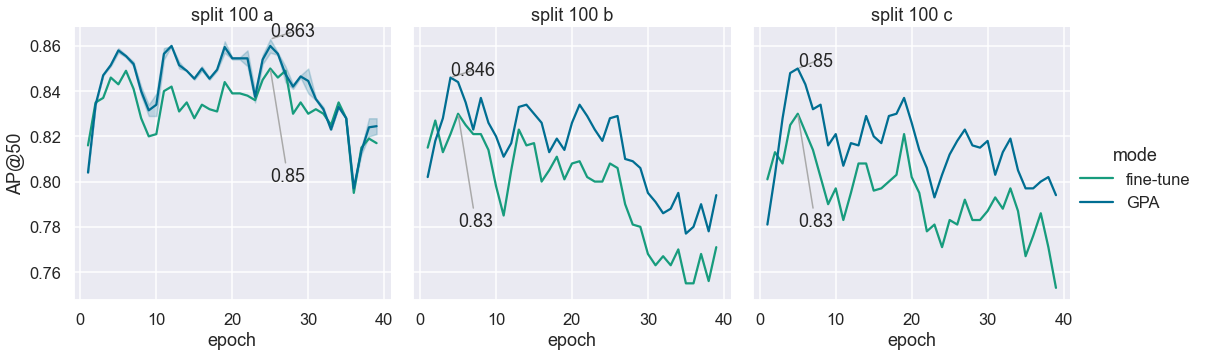

In [66]:
# how well do improvements generalize across splits of the same size?
# -> intra-split: very well, difference < 0.5pp
# -> inter-split: very well, difference < 0.5pp
logs = [['GPA/tuning/coco_piropo_100a_ft_80_step40_seeded.log', 'a', '0', 'fine-tune'],
        ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed0.log', 'a', '0', 'GPA'],
        ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed1.log', 'a', '1', 'GPA'],
        ['GPA/tuning/coco_piropo_100b_ft_80_step40_seeded.log', 'b', '0', 'fine-tune'],
        ['GPA/tuning/coco_piropo_100b_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', 'b', '0', 'GPA'],
        ['GPA/tuning/coco_piropo_100c_ft_80_step40_seeded.log', 'c', '0', 'fine-tune'],
        ['GPA/tuning/coco_piropo_100c_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', 'c', '0', 'GPA']]

sb.set_context('talk')

dfs = []
maxs = []
for log, split, i, mode in logs:
    df = pd.DataFrame(keys_from_log(log, ['bbox_mAP_50']))
    # df = pd.DataFrame(keys_from_log(log, ['loss', 'roi_loss_intra', 'roi_loss_inter', 'rcnn_loss_intra', 'rcnn_loss_inter']))
    df = df.melt(id_vars=['occurence'], var_name='metric')
    # remove every second occurence and label them correctly
    df['occurence']=df['occurence']/2+1
    df = df.drop(df[df['occurence']%1!=0].index) 
    df.insert(loc=2, column='split', value=split)
    df.insert(loc=3, column='i', value=i)
    df.insert(loc=4, column='mode', value=mode)

    maxs.append(df.loc[df[df['metric']=='bbox_mAP_50']['value'].idxmax()])
    dfs.append(df)

df = pd.concat(dfs, axis=0)
g = sb.relplot(data=df.loc[df['occurence']<40], x='occurence', y='value', hue='mode', col='split', kind='line', height=5, aspect=1.)
g.set_axis_labels('epoch', 'AP@50')
g.set_titles(col_template="split 100 {col_name}", row_template="{row_name}")

print([m['value'] for m in maxs])
loc = [[0,0,'d'], [0,0,'u'], None, [0,1,'d'], [0,1,'u'], [0,2,'d'], [0,2,'u']]
arrow={'arrowstyle': '-' ,'color': 'darkgrey'}
# annotate max
for l, m in zip(loc, maxs):
    if l is not None:
        if l[2] == 'u':
            g.axes[l[0]][l[1]].annotate(m['value'], xy=(m['occurence'], m['value']), xytext=(m['occurence'], m['value']+0.001), arrowprops=arrow)
        else:
            g.axes[l[0]][l[1]].annotate(m['value'], xy=(m['occurence'], m['value']), xytext=(m['occurence'], m['value']-0.05), arrowprops=arrow)
g.savefig(f'images/meta_inter_split_consistency_ft_gpa.svg')

[0.804, 0.821, 0.828, 0.829, 0.85, 0.863, 0.886, 0.896]


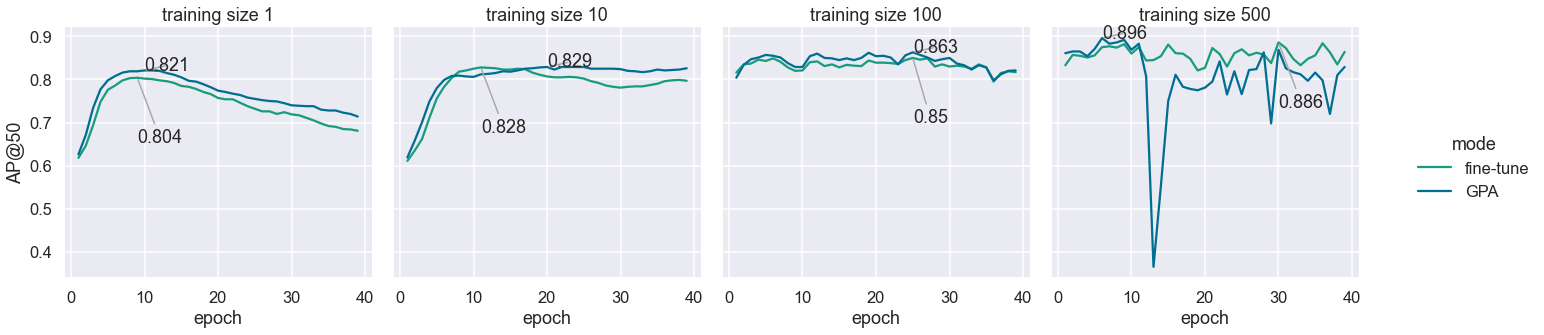

In [25]:
# how well do improvements generalize across splits of the same size and splits of different sizes?
# -> intra-split: very well, difference < 0.5pp
# -> inter-split: very well, difference < 0.5pp
# -> inter-size: very well, difference < 0.5pp
# -> 40 epochs should be enough for every size
logs = [
        ['GPA/tuning/coco_piropo_1a_da0roi0rcnn0intra0inter0nFalsegtFalsemean_squared_seed.log', 1, 'a', '0', 'fine-tune'],
        ['GPA/tuning/coco_piropo_1a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', 1, 'a', '0', 'GPA'],
        ['GPA/tuning/coco_piropo_10a_da0roi0rcnn0intra0inter0nFalsegtFalsemean_squared_seed.log', 10, 'a', '0', 'fine-tune'],
        ['GPA/tuning/coco_piropo_10a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', 10, 'a', '0', 'GPA'],
        ['GPA/tuning/coco_piropo_100a_ft_80_step40_seeded.log', 100, 'a', '0', 'fine-tune'],
        ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed0.log', 100, 'a', '0', 'GPA'],
        # ['GPA/tuning/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed1.log', 100, 'a', '1', 'GPA'],
        # ['GPA/tuning/coco_piropo_100b_ft_80_step40_seeded.log', 100, 'b', '0', 'fine-tune'],
        # ['GPA/tuning/coco_piropo_100b_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', 100, 'b', '0', 'GPA'],
        # ['GPA/tuning/coco_piropo_100c_ft_80_step40_seeded.log', 100, 'c', '0', 'fine-tune'],
        # ['GPA/tuning/coco_piropo_100c_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', 100, 'c', '0', 'GPA'],
        ['GPA/tuning/coco_piropo_500a_da0roi0rcnn0intra0inter0nFalsegtFalsemean_squared_seed.log', 500, 'a', '0', 'fine-tune'],
        ['GPA/tuning/coco_piropo_500a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', 500, 'a', '0', 'GPA'],
    ]

sb.set_context('talk')

dfs = []
maxs = []
for log, size, split, i, mode in logs:
    df = pd.DataFrame(keys_from_log(log, ['bbox_mAP_50']))
    # df = pd.DataFrame(keys_from_log(log, ['loss', 'roi_loss_intra', 'roi_loss_inter', 'rcnn_loss_intra', 'rcnn_loss_inter']))
    df = df.melt(id_vars=['occurence'], var_name='metric')
    # remove every second occurence and label them correctly
    df['occurence']=df['occurence']/2+1
    df = df.drop(df[df['occurence']%1!=0].index) 
    df.insert(loc=2, column='size', value=size)
    df.insert(loc=3, column='split', value=split)
    df.insert(loc=4, column='i', value=i)
    df.insert(loc=5, column='mode', value=mode)

    maxs.append(df.loc[df[df['metric']=='bbox_mAP_50']['value'].idxmax()])
    dfs.append(df)

df.head()
df = pd.concat(dfs, axis=0)
# g = sb.relplot(data=df, x='occurence', y='value', hue='mode', row='size', col='split', kind='line')
g = sb.FacetGrid(df.loc[df['occurence']<40], row='split', col='size', hue='mode', height=5, aspect=1., margin_titles=True)
g.map(sb.lineplot, 'occurence', 'value', err_style='bars')
g.add_legend()
# plt.yscale('log')
g.set_titles(col_template="training size {col_name}", row_template='')
g.set_axis_labels('epoch', 'AP@50')

print([m['value'] for m in maxs])
loc = [[0,0,'d'], [0,0,'u'], [0,1,'d'], [0,1,'u'], [0,2,'d'], [0,2,'u'], [0,3,'d'], [0,3,'u']]
arrow={'arrowstyle': '-' ,'color': 'darkgrey'}
# annotate max
for l, m in zip(loc, maxs):
    if l is not None:
        if l[2] == 'u':
            g.axes[l[0]][l[1]].annotate(m['value'], xy=(m['occurence'], m['value']), xytext=(m['occurence'], m['value']), arrowprops=arrow)
        else:
            g.axes[l[0]][l[1]].annotate(m['value'], xy=(m['occurence'], m['value']), xytext=(m['occurence'], m['value']-0.15), arrowprops=arrow)
g.savefig(f'images/meta_inter_size_consistency_ft_gpa.svg')